In [1]:
import os.path as osp
from glob import glob
import xarray as xr
from utils import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
data_dir = 'data'
datafiles = glob(osp.join(data_dir, '*.cube'))
datafiles

['data/_I50_L0-511_3-10-2018_10.59.48_White.cube',
 'data/_I50_L0-511_3-10-2018_11.9.8_Black.cube',
 'data/_I50_L0-511_3-10-2018_14.0.19_Dark.cube']

In [4]:
dark = xr.open_rasterio(datafiles[-1])
datafiles = datafiles[:-1]
datafiles

/home/maaleske/miniconda3/envs/colortiles/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


['data/_I50_L0-511_3-10-2018_10.59.48_White.cube',
 'data/_I50_L0-511_3-10-2018_11.9.8_Black.cube']

In [5]:
data_raw = [xr.open_rasterio(f) for f in datafiles]
data_raw[0]

/home/maaleske/miniconda3/envs/colortiles/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


<xarray.DataArray (band: 128, y: 696, x: 520)>
[46325760 values with dtype=uint16]
Coordinates:
  * band        (band) int64 1 2 3 4 5 6 7 8 ... 121 122 123 124 125 126 127 128
  * y           (y) float64 0.5 1.5 2.5 3.5 4.5 ... 692.5 693.5 694.5 695.5
  * x           (x) float64 0.5 1.5 2.5 3.5 4.5 ... 516.5 517.5 518.5 519.5
    wavelength  (band) float64 372.5 377.5 382.5 ... 1.038e+03 1.044e+03
Attributes:
    transform:            (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
    res:                  (1.0, -1.0)
    is_tiled:             0
    nodatavals:           (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
    bands:                128
    byte_order:           0
    data_type:            12
    description:          
    file_type:            ENVI Standard
    header_offset:        32768
    interleave:           bil
    lines:                696
    major_frame_offsets:  0, 0
    samples:              520
    sensor_type:          Unknown
    wavelength_units:     Unknown

In [6]:
data = [sub_dark(x, dark) for x in data_raw]

/home/maaleske/miniconda3/envs/colortiles/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()
/home/maaleske/miniconda3/envs/colortiles/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()
/home/maaleske/miniconda3/envs/colortiles/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()
/home/maaleske/miniconda3/envs/colortiles/lib/python3.7/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


In [7]:
data = [band2wl(x) for x in data]

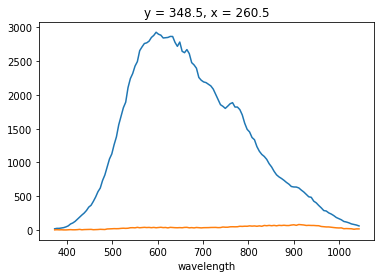

In [8]:
POI = {'x':260, 'y':348}
plt.figure()
for cube in data:
    cube.isel(**POI).plot()
plt.show()

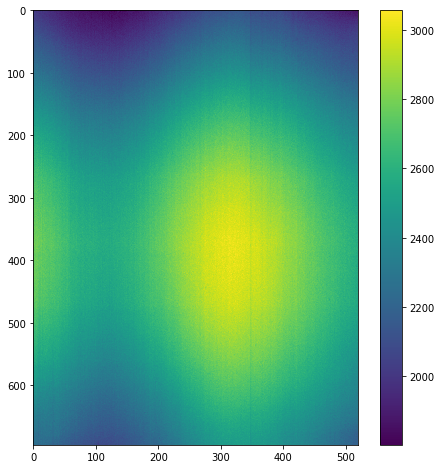

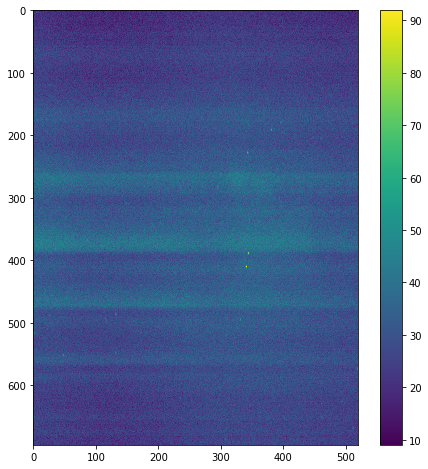

In [18]:
ROI = {'x': slice(50, 471), 'y': slice(50, 350)}
WL = 600
for cube in data:
    plt.figure(figsize=(8,8))
    plt.imshow(cube.sel(wavelength=WL, method='nearest')) #.sel(**ROI))
    plt.colorbar()
    plt.show()

In [19]:
refls = [d / data[0] for d in data]

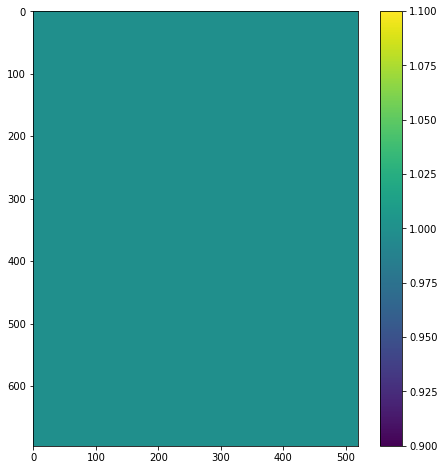

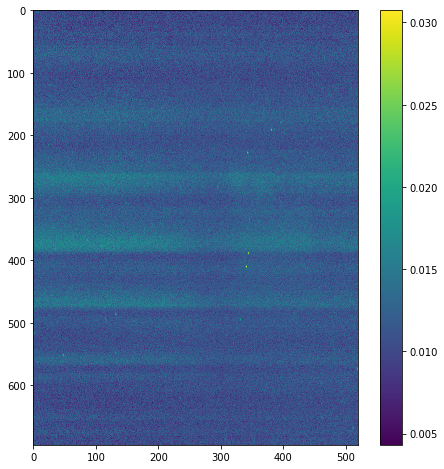

In [23]:
for cube in refls:
    plt.figure(figsize=(8,8))
    plt.imshow(cube.sel(wavelength=WL, method='nearest')) #.sel(**ROI))
    plt.colorbar()
    plt.show()